`Analysis` of `consumer electronics` will be made in a given electronics product pricing dataset below. In this project `price changing over the years`,`product categories depeding on prices`,  `primary products`, `different consumers and brands` etc. will be investigated based on related dataset. 

To get a better understanding of the dataset some necessary modules will be imported below.

<b> About Dataset

This dataset contains pricing information of electronic products. There are 25 columns including the target variable. Some of the variables which will be used on data analysis process are listed below:

- prices.availability: if the product is available at the given price
- prices.condition: condition of the product
- prices.currency: price currency
- prices.isSale: Is the product on sale at given price
- prices.merchant: The merchant
- imageURLs: product image url
- manufacturer: Manufacturer of the product
- manufacturerNumber: Manufacturer number
- name: Name of the product
- primaryCategories: Primary category of the product
- weight: weight of the product

<b> Importing Modules

In [347]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

## Data Preprocessing and Understanding

In [348]:
# reading csv file into DataFrame
df = pd.read_csv('electronics_products_pricing.csv')

In [349]:
# printing out all columns of DataFrame for better understanding
pd.set_option('display.max_columns', None)

In [351]:
# inspecting first five rows of dataset
df.head()

,id,prices.availability,prices.condition,prices.currency,prices.dateSeen,prices.isSale,prices.merchant,prices.shipping,prices.sourceURLs,asins,brand,categories,dateAdded,dateUpdated,ean,imageURLs,keys,manufacturer,manufacturerNumber,name,primaryCategories,sourceURLs,upc,weight,price
0,AVphrugr1cnluZ0-FOeH,Yes,New,USD,"2017-05-10T20:00:00Z,2017-05-09T15:00:00Z",False,Bestbuy.com,NaN,http://www.bestbuy.com/site/products/7100293.p...,B00I9HD8PK,Grace Digital,"Electronics,Home Audio & Theater,Home Audio,Al...",2015-11-01T00:57:52Z,2018-02-13T19:46:08Z,NaN,https://i5.walmartimages.com/asr/dd5f42c4-076c...,"819127010485,ecoxgearecostonebluetoothspeaker/...",Ecoxgear,GDI-EGST701,EcoXGear Ecostone Bluetooth Speaker,Electronics,http://www.walmart.com/ip/EcoXGear-Ecostone-Bl...,8.19E+11,3 pounds,92.99
1,AVrI6FDbv8e3D1O-lm4R,Yes,New,USD,"2017-10-10T02:00:00Z,2017-08-12T03:00:00Z,2017...",False,Bestbuy.com,NaN,https://www.bestbuy.com/site/lenovo-100s-14ibr...,B06ZY63J8H,Lenovo,"Electronics,Computers,Laptops,Laptops By Brand...",2017-03-13T18:22:32Z,2018-01-30T06:06:16Z,NaN,https://i5.walmartimages.com/asr/fcc50cce-a3c1...,"190793918948,lenovo100s14ibr14laptopintelceler...",NaN,100s-14ibr,Lenovo - 100S-14IBR 14 Laptop - Intel Celeron ...,Electronics,https://www.walmart.com/ip/Lenovo-100S-14IBR-1...,1.91E+11,4.3 pounds,229.99
2,AVpiLlubilAPnD_xBoTa,Yes,New,USD,"2017-10-10T19:00:00Z,2017-09-12T14:00:00Z,2017...",False,Bestbuy.com,NaN,https://www.bestbuy.com/site/house-of-marley-s...,B00G3P9UMU,House of Marley,"Headphones,Consumer Electronics,Portable Audio...",2014-10-28T18:47:20Z,2018-05-16T20:23:54Z,8.47E+11,https://i5.walmartimages.com/asr/c124aa15-b9e3...,"0846885007037,houseofmarleysmilejamaicainearea...",House Of Marley,EM-JE041-MI,House of Marley Smile Jamaica In-Ear Earbuds,Electronics,https://www.walmart.com/ip/House-of-Marley-Smi...,8.47E+11,0.6 ounces,16.99
3,AVpgQP5vLJeJML43LQbd,Yes,New,USD,"2017-09-08T05:00:00Z,2017-09-18T13:00:00Z,2017...",False,Bestbuy.com,NaN,https://www.bestbuy.com/site/products/6311012....,B00TTWZFFA,Sony,"Electronics,Home Audio & Theater,Home Audio,Al...",2015-11-06T00:24:21Z,2018-01-30T03:06:18Z,NaN,https://i5.walmartimages.com/asr/1be435f7-5f3a...,"sonyultraportablebluetoothspeaker/sosrsx11bk,s...",Sony,SRSX11/BLK,Sony Ultra-Portable Bluetooth Speaker,Electronics,https://www.walmart.com/ip/Sony-Ultra-Portable...,27242886599,1 pounds,69.99
4,AV1YDsmoGV-KLJ3adcbe,More on the Way,New,USD,2017-12-05T13:00:00Z,True,bhphotovideo.com,Free Expedited Shipping for most orders over $49,https://www.bhphotovideo.com/c/product/1105014...,B00MHPAF38,Sony,"Digital Cameras,Cameras & Photo,Used:Digital P...",2017-07-18T23:35:50Z,2018-07-26T15:58:38Z,NaN,http://i.ebayimg.com/thumbs/images/g/TBUAAOSwd...,sonyalphaa5100digitalcamerakitwith1650mmlenswh...,NaN,ILCE5100L/W,Alpha a5100 Mirrorless Digital Camera with 16-...,Electronics,https://reviews.bestbuy.com/3545/8429343/revie...,27242883246,9.98 oz 4.09 oz,846.00


## Exploratory Data Analysis (EDA) 

We can quickly check for `data types` and to make sure we do not have any missing values which can prevent the modeling from running correctly by using `.info()` method. As we have seen below, there are some `missing` or `NaN` values on the dataset. Some features will be removed from the datasets after checking `duplicated` and `unknown` or `NaN` values in the dataset. To do this we can use the `.duplicated().sum()` and `isnull().sum()` attributes to find those values on columns. The output will return to number of missing values below. Then, let's investigate some statistical measures in a given dataset.

In [353]:
# checking the columns, number of data points and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5436 entries, 0 to 5435
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   5436 non-null   object 
 1   prices.availability  5436 non-null   object 
 2   prices.condition     5436 non-null   object 
 3   prices.currency      5436 non-null   object 
 4   prices.dateSeen      5436 non-null   object 
 5   prices.isSale        5436 non-null   bool   
 6   prices.merchant      5436 non-null   object 
 7   prices.shipping      3199 non-null   object 
 8   prices.sourceURLs    5436 non-null   object 
 9   asins                5436 non-null   object 
 10  brand                5436 non-null   object 
 11  categories           5436 non-null   object 
 12  dateAdded            5436 non-null   object 
 13  dateUpdated          5436 non-null   object 
 14  ean                  1175 non-null   object 
 15  imageURLs            5436 non-null   o

<b> Checking `duplicated values` on a dataset. There is no duplicated values.

In [354]:
print('There are {} duplicates in the Dataset'.format(df.duplicated().sum()))

There are 0 duplicates in the Dataset


<b> Checking `missing` or `NaN` values and `visualizing` them by using `heatmap` on a dataset. 

In [356]:
# checking missing values
df.isnull().sum()

id                        0
prices.availability       0
prices.condition          0
prices.currency           0
prices.dateSeen           0
prices.isSale             0
prices.merchant           0
prices.shipping        2237
prices.sourceURLs         0
asins                     0
brand                     0
categories                0
dateAdded                 0
dateUpdated               0
ean                    4261
imageURLs                 0
keys                      0
manufacturer           2959
manufacturerNumber        0
name                      0
primaryCategories         0
sourceURLs                0
upc                       0
weight                    0
price                     0
dtype: int64

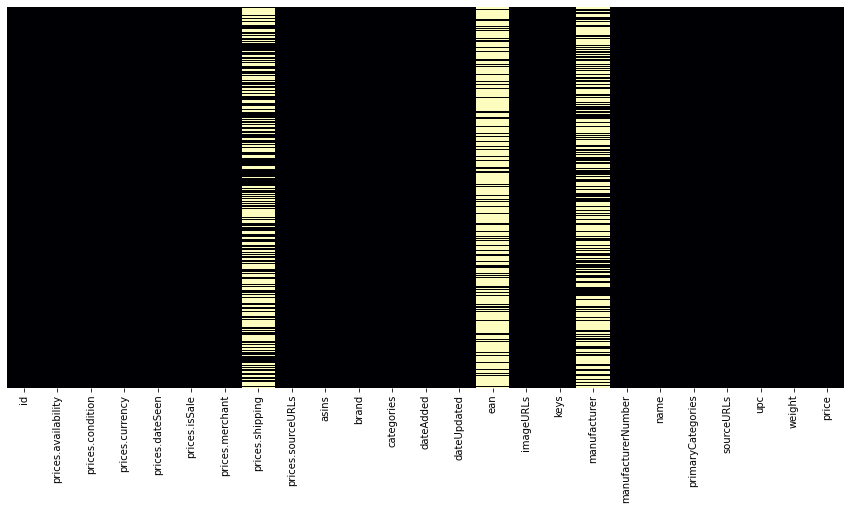

In [361]:
# visualizing missing values using heatmap
plt.figure(figsize = (15, 7))

sns.heatmap(data = df.isnull() , cmap = "magma" , cbar = False , 
            yticklabels=False , xticklabels=True)

plt.show()

In [362]:
df.columns

Index(['id', 'prices.availability', 'prices.condition', 'prices.currency',
       'prices.dateSeen', 'prices.isSale', 'prices.merchant',
       'prices.shipping', 'prices.sourceURLs', 'asins', 'brand', 'categories',
       'dateAdded', 'dateUpdated', 'ean', 'imageURLs', 'keys', 'manufacturer',
       'manufacturerNumber', 'name', 'primaryCategories', 'sourceURLs', 'upc',
       'weight', 'price'],
      dtype='object')

<b> After visualizing the dataset we can see that we have some missing values on `prices.shipping`, `ean` and `manufacturer` columns. If there are null values more than `30 %` for each column, it can be droped `statistically` by using `drop.na` attribute.

In [363]:
df.dropna(axis =1 , thresh=df.shape[0] * 0.70 , inplace = True)

<b> After removing the missing values from dataset we will check them lastly below. We have seen that there is no `NaN` values on a columns

In [364]:
df.isnull().sum()

id                     0
prices.availability    0
prices.condition       0
prices.currency        0
prices.dateSeen        0
prices.isSale          0
prices.merchant        0
prices.sourceURLs      0
asins                  0
brand                  0
categories             0
dateAdded              0
dateUpdated            0
imageURLs              0
keys                   0
manufacturerNumber     0
name                   0
primaryCategories      0
sourceURLs             0
upc                    0
weight                 0
price                  0
dtype: int64

<b>Finally, we can say that if we have any `missing values below than 30 % ` we can also replace them with columns' `mean or median` by checking the statistical information both of them.

## Feature Engineering 

Feature Engineering refers to the process by which we choose the important `features` (or columns) to look at, and make the appropriate transformations to prepare our data.

We might try:

- Select and Split the Data
- Removing Unnecessary Columns
- Data Visualization

### Select and Split the Data

In [365]:
df.head(2)

,id,prices.availability,prices.condition,prices.currency,prices.dateSeen,prices.isSale,prices.merchant,prices.sourceURLs,asins,brand,categories,dateAdded,dateUpdated,imageURLs,keys,manufacturerNumber,name,primaryCategories,sourceURLs,upc,weight,price
0,AVphrugr1cnluZ0-FOeH,Yes,New,USD,"2017-05-10T20:00:00Z,2017-05-09T15:00:00Z",False,Bestbuy.com,http://www.bestbuy.com/site/products/7100293.p...,B00I9HD8PK,Grace Digital,"Electronics,Home Audio & Theater,Home Audio,Al...",2015-11-01T00:57:52Z,2018-02-13T19:46:08Z,https://i5.walmartimages.com/asr/dd5f42c4-076c...,"819127010485,ecoxgearecostonebluetoothspeaker/...",GDI-EGST701,EcoXGear Ecostone Bluetooth Speaker,Electronics,http://www.walmart.com/ip/EcoXGear-Ecostone-Bl...,8.19E+11,3 pounds,92.99
1,AVrI6FDbv8e3D1O-lm4R,Yes,New,USD,"2017-10-10T02:00:00Z,2017-08-12T03:00:00Z,2017...",False,Bestbuy.com,https://www.bestbuy.com/site/lenovo-100s-14ibr...,B06ZY63J8H,Lenovo,"Electronics,Computers,Laptops,Laptops By Brand...",2017-03-13T18:22:32Z,2018-01-30T06:06:16Z,https://i5.walmartimages.com/asr/fcc50cce-a3c1...,"190793918948,lenovo100s14ibr14laptopintelceler...",100s-14ibr,Lenovo - 100S-14IBR 14 Laptop - Intel Celeron ...,Electronics,https://www.walmart.com/ip/Lenovo-100S-14IBR-1...,1.91E+11,4.3 pounds,229.99


In [367]:
# checking the dateAdded column
print(df['dateAdded'])

0       2015-11-01T00:57:52Z
1       2017-03-13T18:22:32Z
2       2014-10-28T18:47:20Z
3       2015-11-06T00:24:21Z
4       2017-07-18T23:35:50Z
                ...         
5431    2017-03-03T16:56:54Z
5432    2015-11-06T13:27:00Z
5433    2017-07-18T23:53:27Z
5434    2014-02-20T05:00:58Z
5435    2015-05-18T12:41:24Z
Name: dateAdded, Length: 5436, dtype: object


In [369]:
# Splitting dateAdded column and adding only years to the DaTaFrame for visualizing data
df['year_added'] = df['dateAdded'].apply(lambda x: x.split('-')[0])

In [370]:
df['year_added']

0       2015
1       2017
2       2014
3       2015
4       2017
        ... 
5431    2017
5432    2015
5433    2017
5434    2014
5435    2015
Name: year_added, Length: 5436, dtype: object

In [371]:
# # checking the dateUpdated column
print(df['dateUpdated'])

0       2018-02-13T19:46:08Z
1       2018-01-30T06:06:16Z
2       2018-05-16T20:23:54Z
3       2018-01-30T03:06:18Z
4       2018-07-26T15:58:38Z
                ...         
5431    2018-05-16T20:24:25Z
5432    2018-07-26T15:58:25Z
5433    2018-07-26T15:58:00Z
5434    2018-05-02T14:22:47Z
5435    2018-07-26T15:56:45Z
Name: dateUpdated, Length: 5436, dtype: object


In [373]:
# Splitting dateUpdated column and adding only years to the DaTaFrame for visualizing data
df['year_updated'] = df['dateUpdated'].apply(lambda x: x.split('-')[0])

In [374]:
df['year_updated']

0       2018
1       2018
2       2018
3       2018
4       2018
        ... 
5431    2018
5432    2018
5433    2018
5434    2018
5435    2018
Name: year_updated, Length: 5436, dtype: object

<b> After spliting `dateAdded` and `dateUpdated` columns into the years on a adataset we can drop these columns by using pandas `.drop()` attribute. Finally, we need to change the data types of  `year_added` and `year_updated` new columns into the numeric (integer) type for better visualizing.

In [375]:
# dropping columns from dataset
df.drop(columns = ["dateAdded" , "dateUpdated"] , inplace = True)

In [378]:
# checking the DataFrame for new columns at the end
df.head(1)

,id,prices.availability,prices.condition,prices.currency,prices.dateSeen,prices.isSale,prices.merchant,prices.sourceURLs,asins,brand,categories,imageURLs,keys,manufacturerNumber,name,primaryCategories,sourceURLs,upc,weight,price,year_added,year_updated
0,AVphrugr1cnluZ0-FOeH,Yes,New,USD,"2017-05-10T20:00:00Z,2017-05-09T15:00:00Z",False,Bestbuy.com,http://www.bestbuy.com/site/products/7100293.p...,B00I9HD8PK,Grace Digital,"Electronics,Home Audio & Theater,Home Audio,Al...",https://i5.walmartimages.com/asr/dd5f42c4-076c...,"819127010485,ecoxgearecostonebluetoothspeaker/...",GDI-EGST701,EcoXGear Ecostone Bluetooth Speaker,Electronics,http://www.walmart.com/ip/EcoXGear-Ecostone-Bl...,8.19E+11,3 pounds,92.99,2015,2018


In [379]:
# changing the `year_added` and `year_updated` columns into the numeric (integer) type
for x in ['year_added', 'year_updated']: 
    df[x] = pd.to_numeric(df[x])

On the other hand, in here some categories can be `grouped` by `categories` or `brands` by using pandas `groupby()` method below.

In [380]:
# grouping primaryCategories by counting their all features
df.groupby(['primaryCategories']).count().reset_index()

,primaryCategories,id,prices.availability,prices.condition,prices.currency,prices.dateSeen,prices.isSale,prices.merchant,prices.sourceURLs,asins,brand,categories,imageURLs,keys,manufacturerNumber,name,sourceURLs,upc,weight,price,year_added,year_updated
0,Apple CarPlay,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22
1,Intel Celeron,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
2,Siri Eyes Free,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
3,Electronics,5392,5392,5392,5392,5392,5392,5392,5392,5392,5392,5392,5392,5392,5392,5392,5392,5392,5392,5392,5392,5392
4,"Electronics,Furniture",8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8


In [381]:
# grouping primaryCategories and brands by their id`s
df.groupby(['primaryCategories', 'brand']).id.count().reset_index().head(10)

,primaryCategories,brand,id
0,Apple CarPlay,Kenwood,22
1,Intel Celeron,Acer,9
2,Siri Eyes Free,Pioneer,5
3,Electronics,360fly,18
4,Electronics,AOC,20
5,Electronics,ASUS,58
6,Electronics,Acer,12
7,Electronics,Actiontec,24
8,Electronics,AfterShokz,3
9,Electronics,Aftershokz,2


In [382]:
# grouping brands and their categories by counting all features
df.groupby(['brand', 'categories']).count().reset_index().head(5)

,brand,categories,id,prices.availability,prices.condition,prices.currency,prices.dateSeen,prices.isSale,prices.merchant,prices.sourceURLs,asins,imageURLs,keys,manufacturerNumber,name,primaryCategories,sourceURLs,upc,weight,price,year_added,year_updated
0,360fly,"Cameras & Photo,360 Cameras,VR 360 Video,Camco...",18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18
1,AOC,"Computers,Computers & Accessories,LCD Monitors...",9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
2,AOC,"Computers,Computers & Accessories,Laptop Acces...",11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11
3,ASUS,"Computers,Asus Laptops,Computers & Accessories...",10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
4,ASUS,"Computers,Computer Monitors ardbvbarzuftq,Comp...",9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9


In [383]:
# grouping prices.merchant by counting their all features
df.groupby(['prices.merchant']).count().reset_index().head(10)

,prices.merchant,id,prices.availability,prices.condition,prices.currency,prices.dateSeen,prices.isSale,prices.sourceURLs,asins,brand,categories,imageURLs,keys,manufacturerNumber,name,primaryCategories,sourceURLs,upc,weight,price,year_added,year_updated
0,"1 Stop Electronics Center, Inc.",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,17th St Photo Supply Inc,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
2,19th Hole Deals,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,1topwire,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,1win,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,2011dailydeals,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
6,305mia65,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
7,428ypz,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
8,47st. Photo,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
9,4surpluscity,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


### Data Visualization

The goals in a data visualization process are to prepare data, followed by analysis with plots, and seek to explain the findings from the dataset. Here, more needs to be explored about the features that are represented in the `DataFrame`

#### Histograms

Histograms are the best plots to check the distribution of the values in a dataset. Exploring data through plots can sometimes be much more effective. Sometimes when data are on a `log scale`, it can be hard to visualize the distribution of the values. Features with `positive` values that are highly `right-skewed` are prime candidates for `log transformation`. Let’s look at the distribution of `price` column as being shown below.

In [384]:
# checking the min price
df.price.min()

1.0

In [385]:
# checking the max price
df.price.max()

6999.99

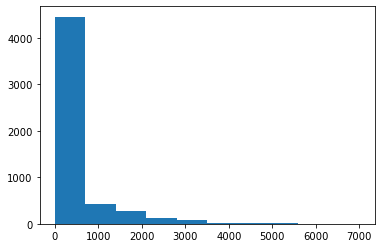

In [386]:
plt.hist(df['price'])

plt.show()

After looking that distriution above we can say that our values with lower prices more than higher prices on a dataset. Here we can see one tall peak on the `left-hand side`, and a very `long right-tail` along the `x-axis`. It might be beneficial to try plotting the distribution of transformed values of `price` instead. 

That histogram provides a lot more information below than the data in the original form. This is helpful knowledge if we want to build a model to predict `price` values in the future.

In [387]:
# finding positive price values
log_pos_price = (df.price[df.price > 0])

In [388]:
# log transformation of price values and adding to the DataFrame as a new column
df['log_price'] = np.log(log_pos_price)

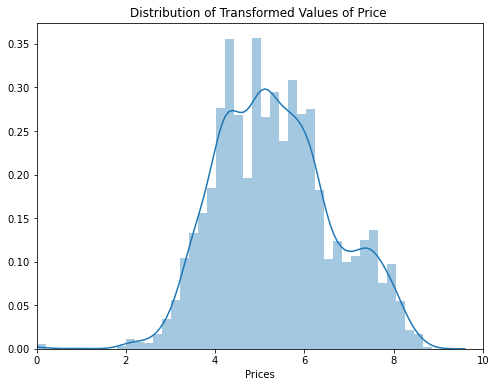

In [389]:
# distribution of the transformed price values
plt.figure(figsize = (8, 6))

sns.distplot(df['log_price'] , kde = True)
plt.title('Distribution of Transformed Values of Price ')
plt.xlabel('Prices')
plt.xlim(0, 10)

plt.show()

In [390]:
# dropping price column after creating the appropriate log_prices column for dataset
df.drop('price', axis = 1, inplace = True)

#### Scatter Plot

Next, let’s create a scatter plot using Python’s seaborn library. Scatter plots are a commonly used data `visualisation` tool. They allow us to identify and determine if there is a `relationship` (correlation) `between two variables` and the strength of that relationship.

After checking the relationships between variables, we can say that the `highest prices` almost were shown around `2018`. In contrary, the lowest prices were around `2014`.

In [391]:
# checking the unique years
df['year_added'].unique()

array([2015, 2017, 2014, 2016, 2018], dtype=int64)

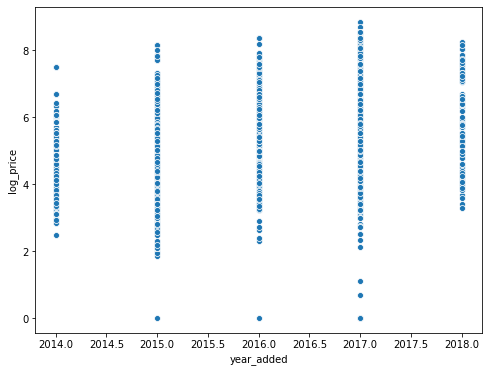

In [393]:
# creating scatter plot checking the correlation between price and added_year
plt.figure(figsize = (8, 6))

sns.scatterplot(x = 'year_added', y = 'log_price', data = df)

plt.show()

Now let's investigate some of the different features which can have more impact on `price` column. In this period pandas helpful `.corr()` method that allows us to see the correlation coefficients for each `numerical pair` of our different features. As we now, if we have correlation coefficients close to `1 or -1` mean that we have `positive` or `negative` linear relationships accordingly. 

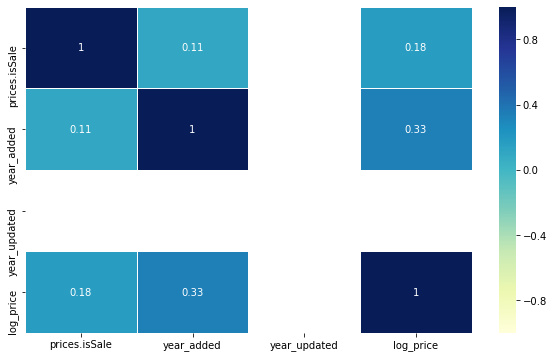

In [394]:
# correlation heatmap for dataset
plt.figure(figsize = (10, 6))

sns.heatmap(df.corr(), 
            vmin = -1, center = 0, vmax = 1,
            annot = True, cmap = 'YlGnBu', linewidth = .5)

plt.show()

#### Boxplot

In descriptive statistics, a box plot or boxplot (also known as box and whisker plot) is a type of chart often used in data analysis. `Box plots` visually show the `distribution of numerical data` and `skewness` through displaying the data quartiles (or percentiles) and averages. In here, I will use the `primaryCategories` column depending on their prices. 

This plot indicates below that `prices` for `Apple CarPlay` and `Electronics,Furniture` products almost tend to be higher and have `less variation` than prices for other categories mean that customers can see `higher prices` at store. Additionally, `electronic` products have `more variation `than other categories. It `means` that customers can encounter with `different prices` for electronic products. 

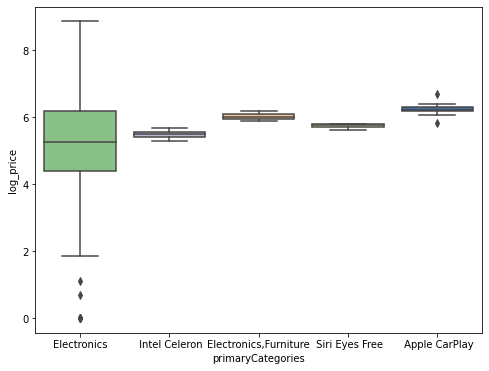

In [321]:
plt.figure(figsize = (8, 6))

sns.boxplot(x='primaryCategories', y='log_price', 
            data=df, palette='Accent')

plt.show()

The good option for investigating the relationship between a `quantitative variable` and a `categorical variable` are side-by-side or grouped box plots. We can compare all `primaryCategories` products with their `added year` and `prices` below. We can say that almost  all categories are added to the list between 2015 and 2017. Electronic products were sold during all the years in a given dataset.

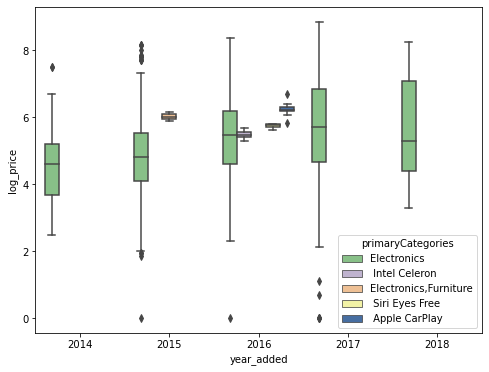

In [396]:
plt.figure(figsize = (8, 6))

sns.boxplot(x='year_added', y='log_price', hue = 'primaryCategories', 
            data=df, palette='Accent')

plt.show()